In [1]:
# Install yfinance to fetch stock data (if not already installed)
!pip install yfinance scikit-learn matplotlib pandas

# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Download stock data (e.g., Apple - AAPL)
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")

# Display first few rows
data.head()


/tmp/ipython-input-1732907826.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [3]:
# Use only 'Close' price
data = data[['Close']]

# Create a column "Prediction" shifted by 30 days
forecast_days = 30
data['Prediction'] = data['Close'].shift(-forecast_days)

# Display last 10 rows
data.tail(10)


/tmp/ipython-input-944866331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['Close'].shift(-forecast_days)


Price,Close,Prediction
Ticker,AAPL,
Date,,
2024-12-17,252.869995,NaN
2024-12-18,247.453079,NaN
2024-12-19,249.188889,NaN
2024-12-20,253.877594,NaN
2024-12-23,254.655716,NaN
2024-12-24,257.578674,NaN
2024-12-26,258.396667,NaN
2024-12-27,254.974930,NaN


In [4]:
# Create feature dataset (X) and target dataset (y)
X = np.array(data.drop(['Prediction'], axis=1))  # all rows except 'Prediction'
X = X[:-forecast_days]  # remove last 30 days (NaN in Prediction)

y = np.array(data['Prediction'])
y = y[:-forecast_days]


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [7]:
# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 167.7177412546133
R2 Score: 0.8959804715362598


In [8]:
# Create a new dataset with last 30 days
X_future = data.drop(['Prediction'], axis=1)[-forecast_days:]

# Predict future 30 days prices
future_predictions = lr.predict(X_future)

print("Predicted Prices for Next 30 Days:")
print(future_predictions)


Predicted Prices for Next 30 Days:
[228.93434709 229.18465348 229.87777795 229.41569988 230.71530825
 233.60335138 235.71161477 235.58646893 237.89690344 240.07256211
 243.01837053 243.36493276 243.39380803 243.20126692 246.96536036
 247.94729649 246.71506868 248.13020761 248.29385872 251.0952613
 253.44418636 248.21684817 249.89190877 254.41652195 255.16741169
 257.98807427 258.77743984 255.47545392 252.21195855 250.49839267]


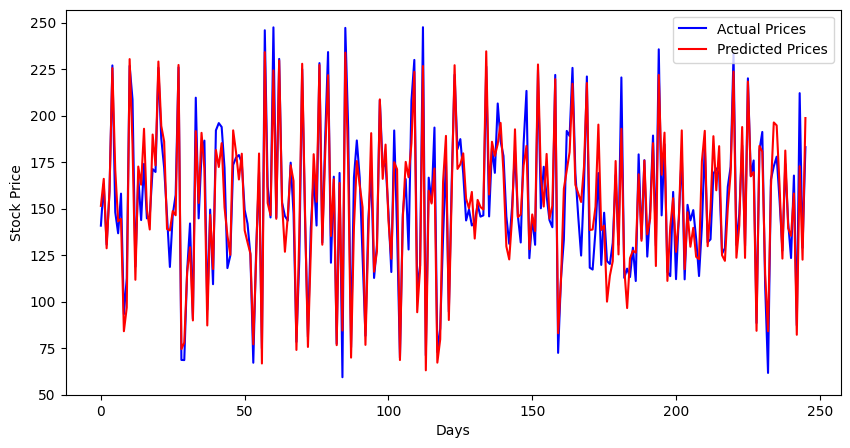

In [9]:
# Plot the results
plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label="Actual Prices")
plt.plot(predictions, color='red', label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


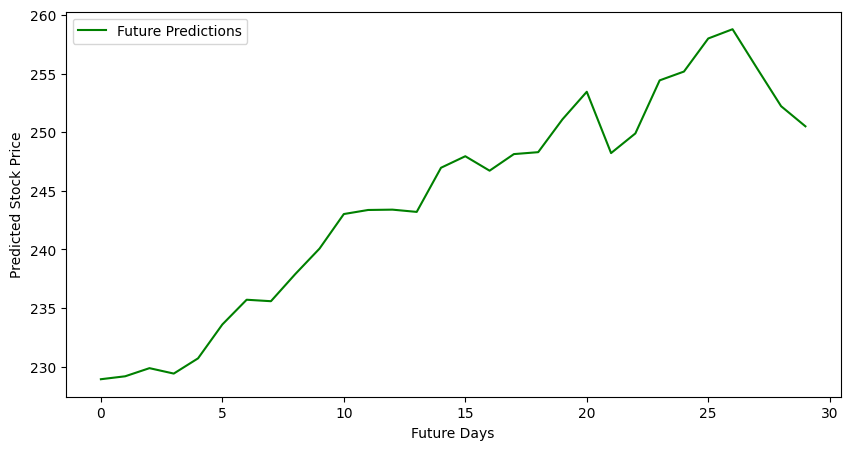

In [10]:
# Plot predicted future prices
plt.figure(figsize=(10,5))
plt.plot(range(len(future_predictions)), future_predictions, color='green', label="Future Predictions")
plt.xlabel("Future Days")
plt.ylabel("Predicted Stock Price")
plt.legend()
plt.show()
